In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv("marketing_AB.csv")

In [6]:
df.shape

(588101, 7)

In [7]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [10]:
#to check if the user id column has any duplicates
df.duplicated(subset="user id").sum()

0

In [13]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
df.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [19]:
#checking the categorical variables
df_cat = df[['test group','converted','most ads day','most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [20]:
for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


#### Univariate Analysis

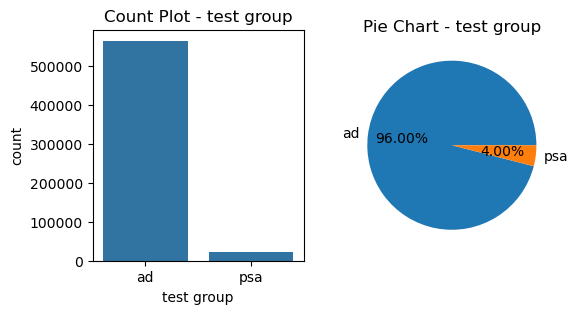

In [31]:
variable = 'test group'

plt.figure(figsize = (6,3))

#Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.show()

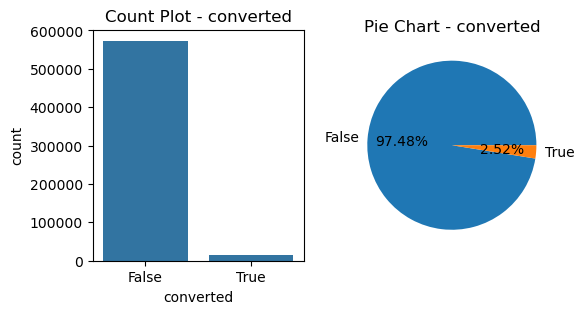

In [43]:
variable = 'converted'

plt.figure(figsize = (6,3))

#Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.show()

C:\Users\javeria3\AppData\Local\Temp\ipykernel_14208\3472383330.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df_cat, order = df_cat['most ads day'].value_counts().index, palette='tab10')


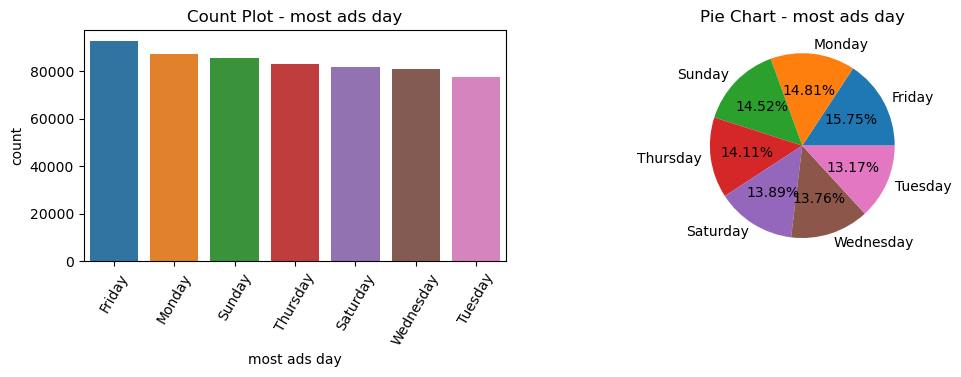

In [42]:
variable = 'most ads day'

plt.figure(figsize = (12,3))

#Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order = df_cat['most ads day'].value_counts().index, palette='tab10')
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation=60)

#pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.show()

C:\Users\javeria3\AppData\Local\Temp\ipykernel_14208\4034368888.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df_cat, order = df_cat['most ads hour'].value_counts().index, palette='tab10')


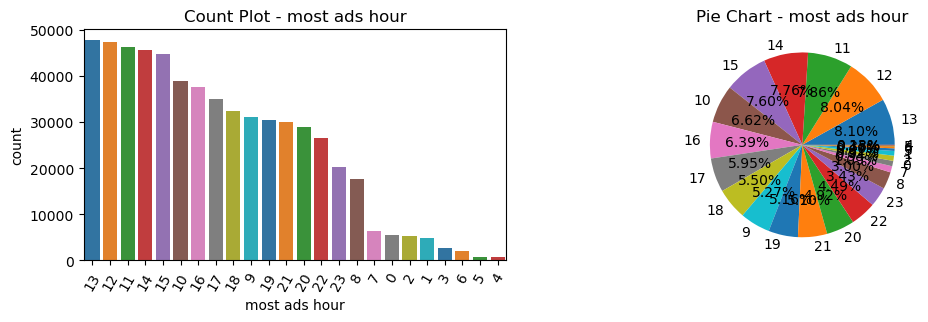

In [44]:
variable = 'most ads hour'

plt.figure(figsize = (12,3))

#Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order = df_cat['most ads hour'].value_counts().index, palette='tab10')
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation=60)

#pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.show()

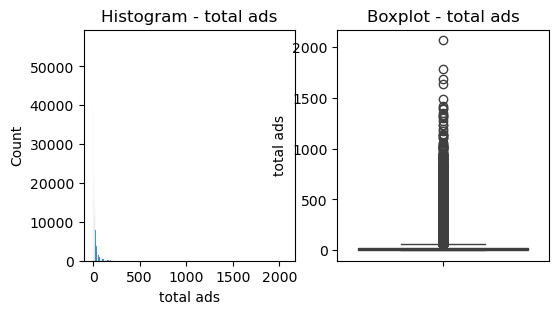

In [47]:
variable = 'total ads'

plt.figure(figsize = (6,3))

#Histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram - {variable}')

#Box plot
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df)
plt.title(f'Boxplot - {variable}')

plt.show()

In [48]:
#to check why the plots are so skewed
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

In [49]:
#we will check for total ads less than 50

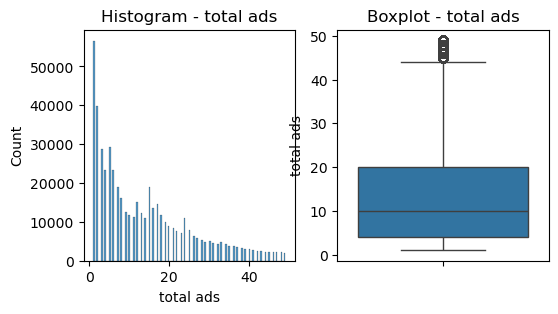

In [50]:
variable = 'total ads'

plt.figure(figsize = (6,3))

#Histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df[df['total ads']<50])
plt.title(f'Histogram - {variable}')

#Box plot
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df[df['total ads']<50])
plt.title(f'Boxplot - {variable}')

plt.show()

#### Bivariate Analysis

In [57]:
#creating a crosstab between converted and test group
ct_conversion_test_group=pd.crosstab(df['test group'], df['converted'], normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<AxesSubplot: xlabel='test group'>

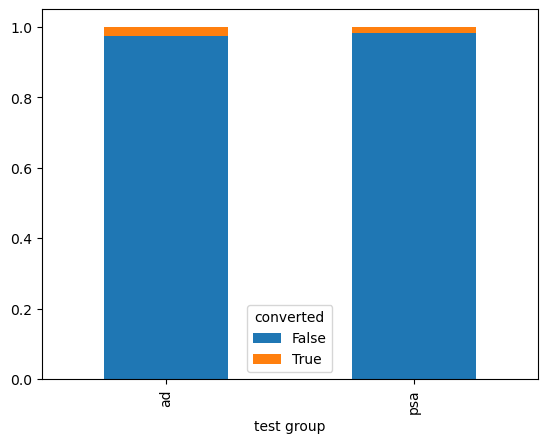

In [58]:
#visualizing the above metrics
ct_conversion_test_group.plot.bar(stacked = True)

In [64]:
#crosstab between most ads day and converted
ct_conversion_day = pd.crosstab(df["most ads day"], df["converted"], normalize="index")
print(ct_conversion_day.sort_values(by=True, ascending = False))

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<AxesSubplot: xlabel='most ads day'>

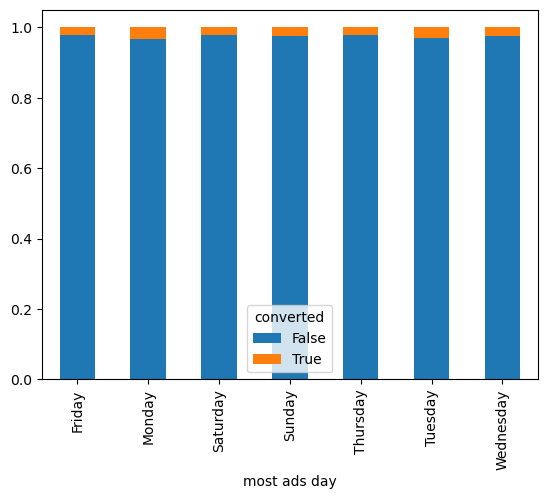

In [65]:
ct_conversion_day.plot.bar(stacked=True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<AxesSubplot: xlabel='most ads hour'>

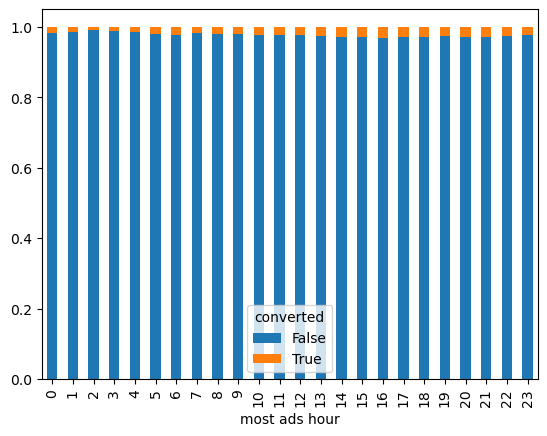

In [67]:
#crosstab between most ads hour and converted
ct_conversion_hour = pd.crosstab(df["most ads hour"], df["converted"], normalize="index")
print(ct_conversion_hour.sort_values(by=False))
ct_conversion_hour.plot.bar(stacked=True)

<AxesSubplot: xlabel='converted', ylabel='total ads'>

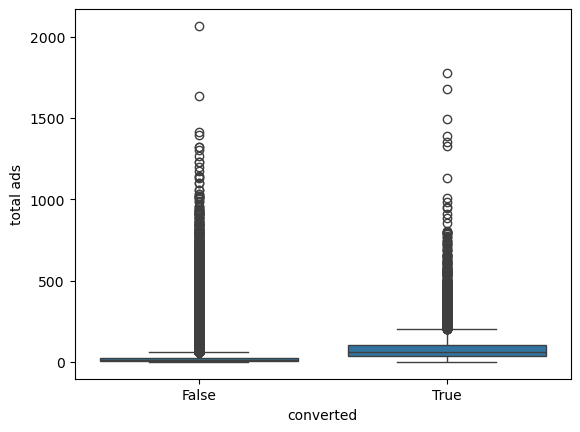

In [68]:
#bivariate analysis between converted and total ads
sns.boxplot(x="converted", y="total ads", data=df)
#the plots seem skewed

<AxesSubplot: xlabel='converted', ylabel='total ads'>

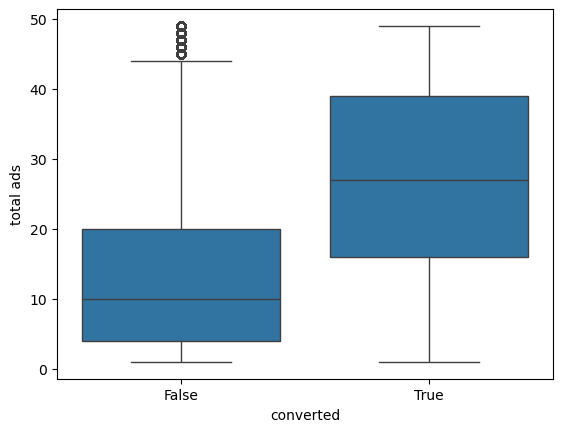

In [70]:
sns.boxplot(x="converted", y="total ads", data=df[df["total ads"]<50])

#### Statistical Tests

In [71]:
#for categorical variables, we will use the chisquare test

In [74]:
from scipy.stats import chi2_contingency
alpha= 0.05
for variable in df_cat.columns:
    if variable != "converted":
        contingency_table = pd.crosstab(df_cat[variable], df_cat["converted"])
        #chisquare test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        #results
        print(f"\nChi-squared test for {variable} vs. converted:")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")
        #significance testing
        if p < alpha:
            print(f"The difference in conversion rates across {variable.upper()} is statically significant.")
        else:
            print(f"There is no significant difference in conversion rates across {variables}.")


Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across TEST GROUP is statically significant.

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across MOST ADS DAY is statically significant.

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across MOST ADS HOUR is statically significant.


In [75]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [76]:
#for numerical variable total ads vs converted 

In [77]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

#checking assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df["converted"] == True] ["total ads"])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df["converted"] == False] ["total ads"])

print(f"Shapiro-wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-wilk test for normality (False group): p-value = {shapiro_p_value_false}")

levene_stat, levene_p_value = levene(df[df["converted"]] ["total ads"] , df[~df["converted"]] ["total ads"])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-wilk test for normality (True group): p-value = 0.0
Shapiro-wilk test for normality (False group): p-value = 0.0
Levene's test for equality of variances: p-value = 0.0


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [78]:
#Performing a suitable Test
alpha=0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    t_stat, t_p_value = ttest_ind(df[df["converted"]] ["total ads"], df[~df["converted"]]["total ads"])
    print(f"Independent two-sample t-test: p value = {t_p_value}")

else:
    u_stat, u_p_value = mannwhitneyu(df[df["converted"]]["total ads"], df[~df["converted"]]["total ads"])
    print(f"Mann-whitney U test: p-value = {u_p_value}")

Mann-whitney U test: p-value = 0.0


In [ ]:
#we conducted the Mann-whitney U test since the others were not applicable. 
#Additionally, through the results we can see that difference between conversion rates across total ads seen is significant.